<a href="https://colab.research.google.com/github/poojabisht10/Autism-Prediction/blob/main/Autism_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Dependencies**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

**Data Loading and inspection**

In [ ]:
df= pd.read_csv('/content/train.csv')
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df.shape

(800, 22)

In [ ]:
#to make sure that all columns are visible
pd.set_option('display.max_columns', None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
# converting age column data tyoe from float to integer
df['age']=df['age'].astype('int')

In [ ]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
for col in df.columns:
  num_feature = ["ID", "age", "result"]
  if col not in num_feature:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [ ]:
#dropping the id and age desc column
df.drop(['ID', 'age_desc'], axis=1, inplace=True)

In [ ]:
df.shape

(800, 20)

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
# define the mapping dictionary for country names
mapping = {
    "Viet Nam":"Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

# replace value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [ ]:
# target class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**Insights :**


1.   Missing values in ethnicity and relation
2.   age_desc column has been removed cuz it had only one unique value.
3.   fixed country names.
4.   Identification of class imbalance.



**Exploaratory data analysis (EDA)**

In [ ]:
df.shape

(800, 20)

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

Numerical columns:
- age
- result

In [ ]:
# set the desired theme
sns.set_theme(style="darkgrid")

Distribution Plots

Mean age : 27.96375 
Median age: 24.0


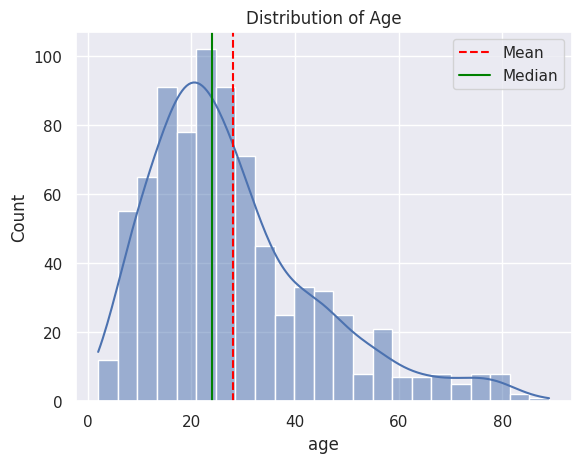

In [ ]:
# Histogram for age
sns.histplot(df["age"],kde=True)
plt.title("Distribution of Age")

# calculate mean and median
age_mean=df["age"].mean()
age_median=df["age"].median()

print("Mean age :",age_mean,"\nMedian age:",age_median)

#add vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")
plt.legend()
plt.show()

Mean result : 8.537303106501248 
Median result: 9.605299308


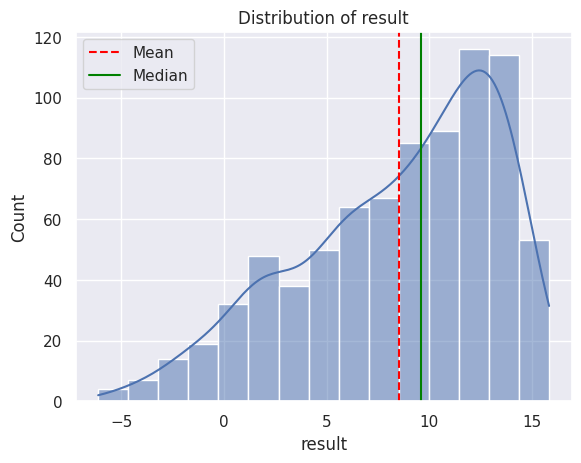

In [ ]:
# Histogram for result
sns.histplot(df["result"],kde=True)
plt.title("Distribution of result")

# calculate mean and median
result_mean=df["result"].mean()
result_median=df["result"].median()

print("Mean result :",result_mean,"\nMedian result:",result_median)

#add vertical lines for mean and median
plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="-", label="Median")
plt.legend()
plt.show()

Box plots for identifying the outliers in the numerical columns

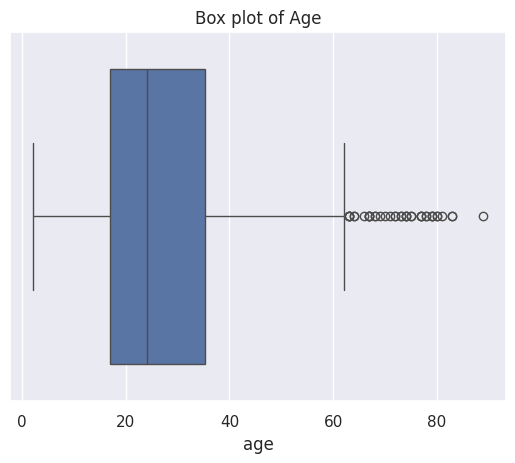

In [ ]:
# box plot
sns.boxplot(data=df, x="age")
plt.title("Box plot of Age")
plt.show()

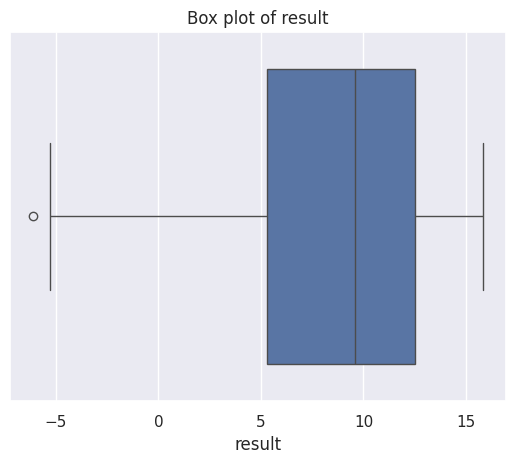

In [ ]:
# box plot
sns.boxplot(data=df, x="result")
plt.title("Box plot of result")
plt.show()

In [ ]:
# count the age outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
print("Number of outliers:", len(age_outliers))

Number of outliers: 39


In [ ]:
# count the result outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]
print("Number of outliers:", len(result_outliers))

Number of outliers: 1


Univariate analysis of categorical column

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

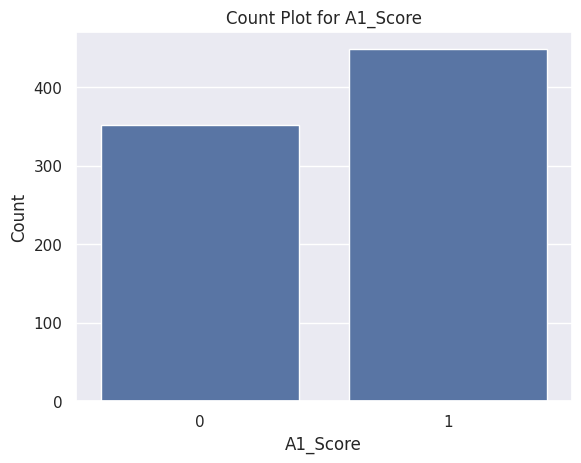

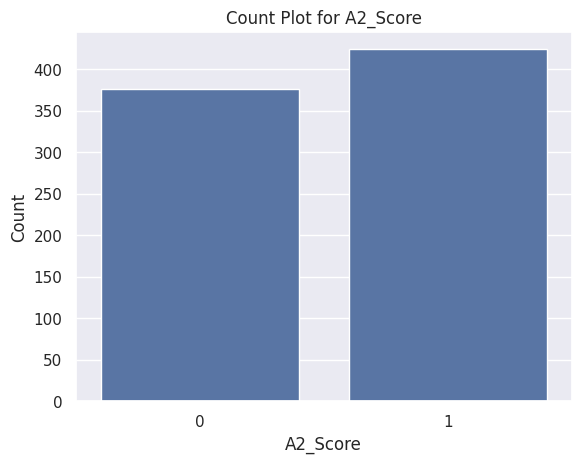

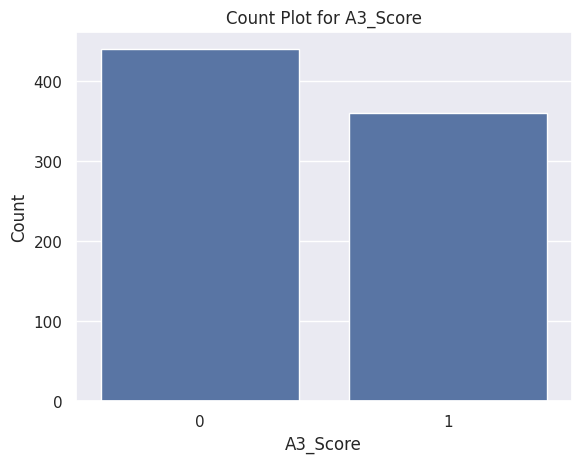

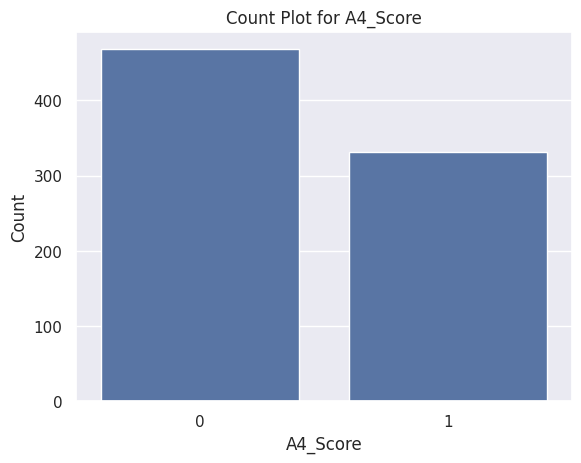

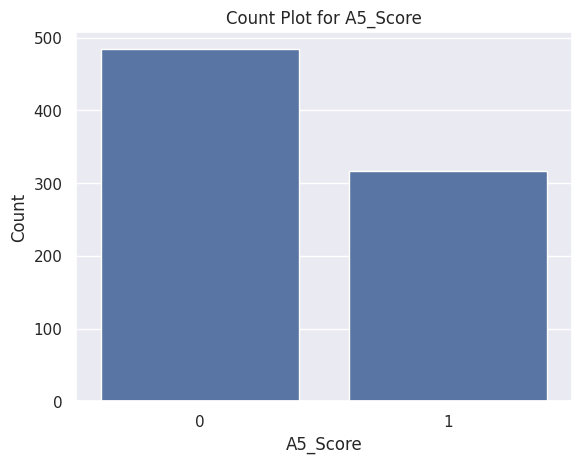

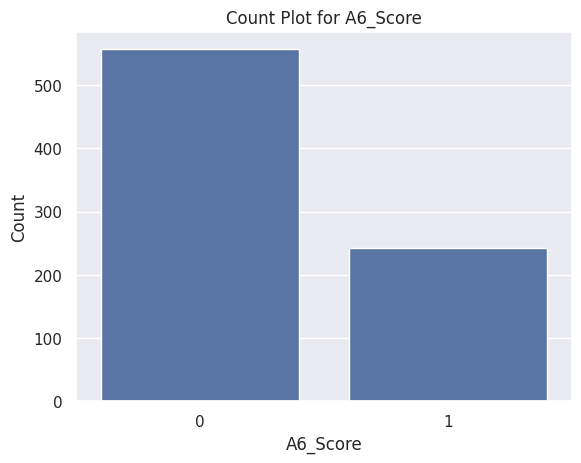

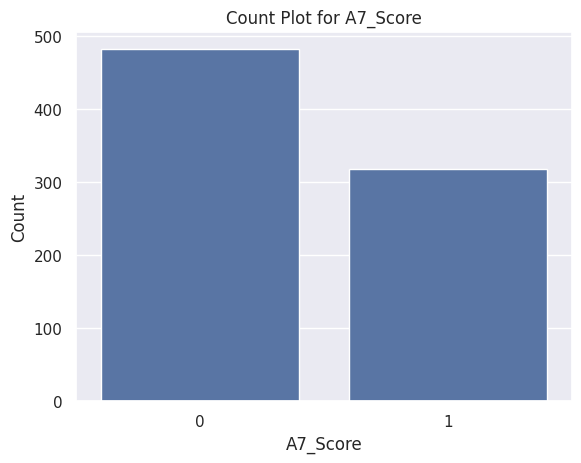

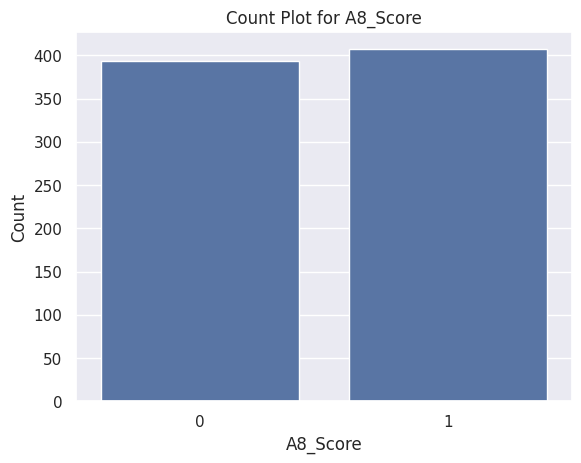

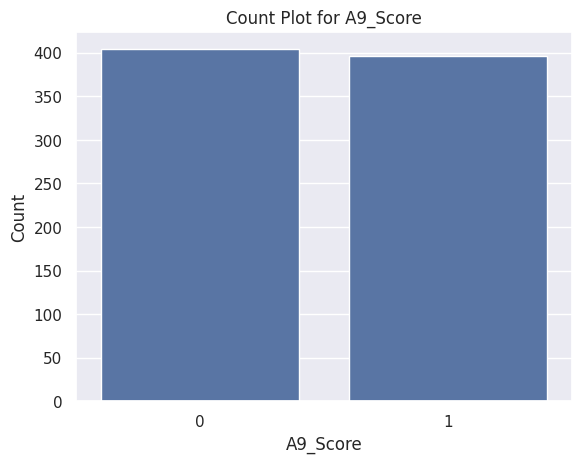

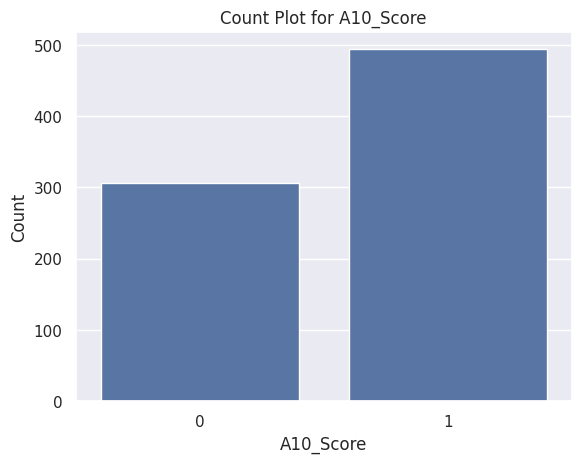

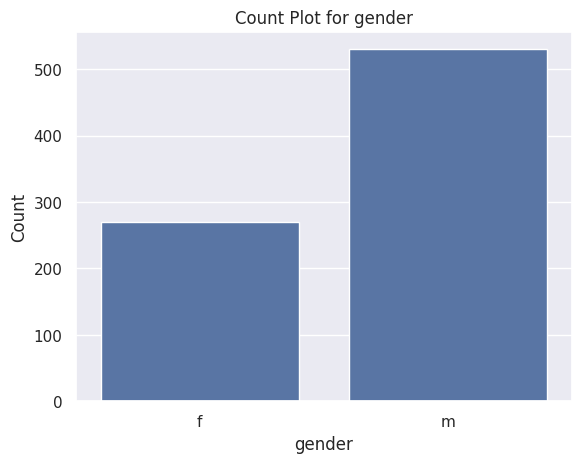

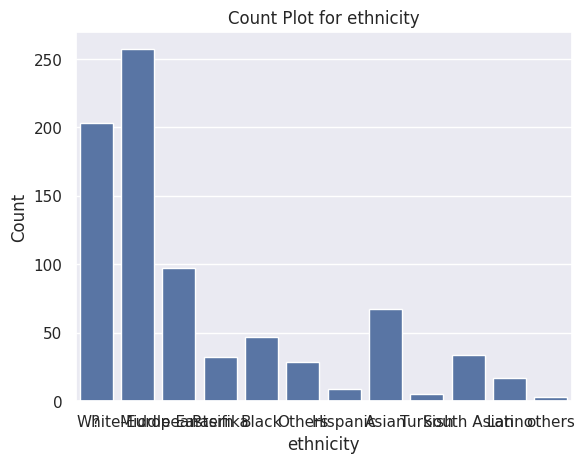

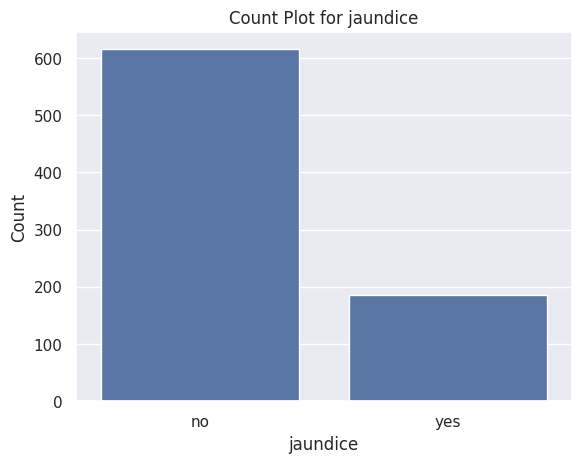

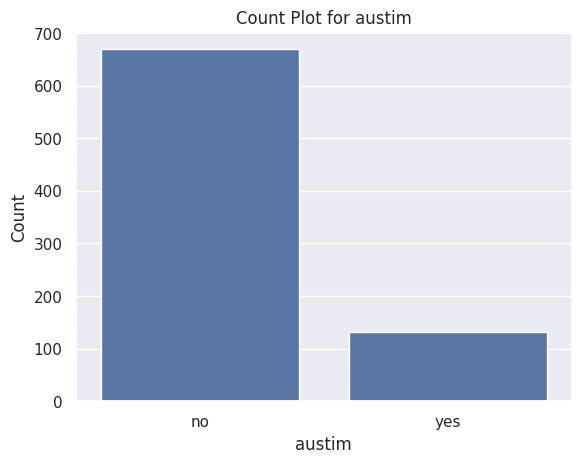

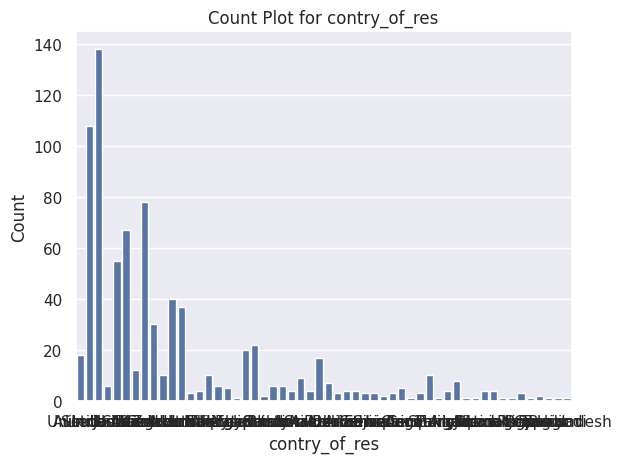

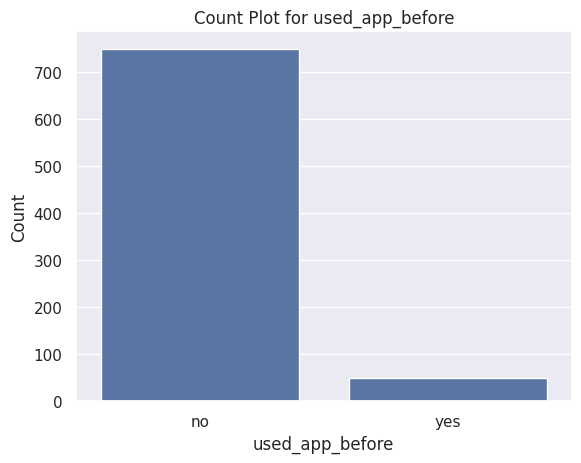

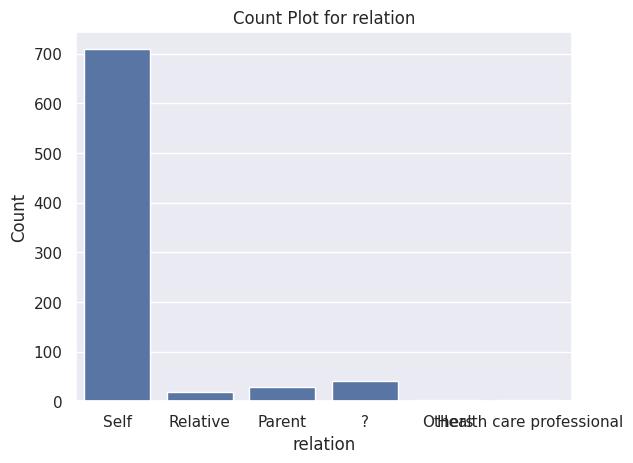

In [ ]:
categorical_col = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']
for col in categorical_col:
  sns.countplot(x=df[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

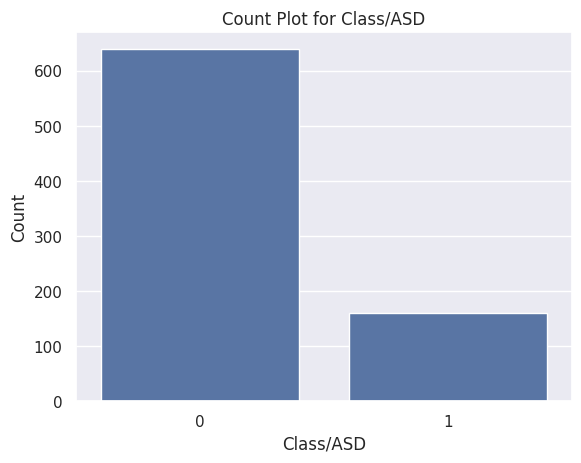

In [ ]:
# countplot for target column
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [ ]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


Handle missing values in ethnicity and relation column

In [ ]:
df["ethnicity"] = df["ethnicity"].replace(
    {"?" : "Others" ,
     "others" : "Others"})
df["relation"] = df["relation"].replace(
    {"?" : "Others" ,
     "Relative" : "Others",
     "Parent" : "Others",
     "Health care professional" : "Others"})

In [ ]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [ ]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

**Label Encoding**

In [ ]:
# identify columns with object data type
obj_col = df.select_dtypes(include="object").columns

In [ ]:
print(obj_col)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [ ]:
# initialize a dictionary to store the encoders
encoders = {}

# apply label encoding and store the encoders
for col in obj_col:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])
  encoders[col] = label_encoder # saving the encoder for this column

# save the encoders as a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [ ]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


**Bivariate Analysis**

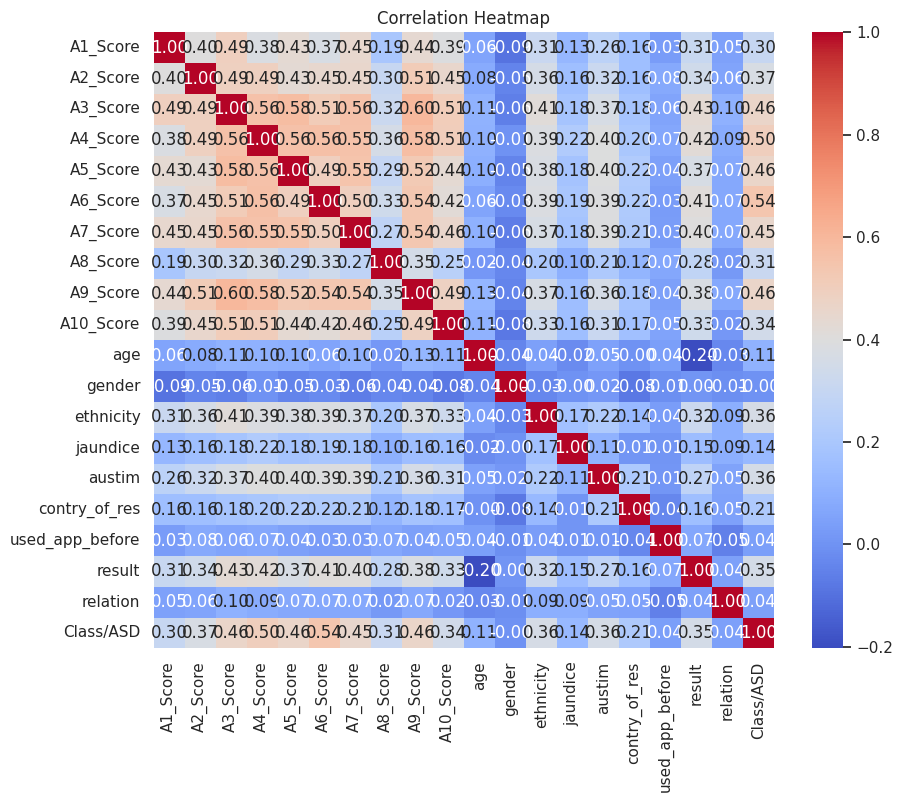

In [ ]:
# correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insights from EDA:**


- There are few outliers in the numerical columns , i.e., age and result
- There is a class imbalance in the target column
- There is a class imbalance in categorical column
- We don't have any highly correlated column
- Performed label encoding and saved encoder as a pickle file



**Data Preprocessing**

Handling the outliers

In [ ]:
# function to replace the outliers with median
def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  median = df[column].median()

  # replace outliers with median value
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df


In [ ]:
#replace outliers in the age column
df = replace_outliers_with_median(df, "age")

#replace outliers in the result column
df = replace_outliers_with_median(df, "result")

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [ ]:
df.shape

(800, 20)

**Train Test Split**

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
X = df.drop(columns="Class/ASD")
Y = df["Class/ASD"]

In [ ]:
print (X.shape)
print (Y.shape)

(800, 19)
(800,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(640, 19)
(160, 19)
(640,)
(160,)


In [ ]:
Y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [ ]:
Y_test.value_counts()

,count
Class/ASD,
0,124
1,36


**SMOTE (Synthetic Minority Over-sampling Technique)**

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
Y_train_smote.value_counts()

,count
Class/ASD,
1,515
0,515


**Model Training**

In [ ]:
# dictionary of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
}


In [ ]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters ...")
  scores = cross_val_score(model, X_train_smote, Y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross validation accuracy: {np.mean(scores):.2f}")
  print("-"*50)

Training Decision Tree with default parameters ...
Decision Tree cross validation accuracy: 0.86
--------------------------------------------------
Training Random Forest with default parameters ...
Random Forest cross validation accuracy: 0.92
--------------------------------------------------
Training Logistic Regression with default parameters ...
Logistic Regression cross validation accuracy: 0.84
--------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'Logistic Regression': array([0.7961165 , 0.86893204, 0.84466019, 0.83495146, 0.83980583])}

**Model Selection and Hyperparameter Tuning**

In [ ]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
logistic_regression = LogisticRegression(max_iter=1000)


In [ ]:
# Hyperparameter tuning for RandomizedSearchCV

param_grid_dt = {
    "criterion" : ["gini" , "entropy"],
    "max_depth" : [None, 10, 20, 30, 50, 70],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4],
}

param_grid_rf = {
    "n_estimators" : [50, 100, 200, 300],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4],
    "bootstrap" : [True, False],
}

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}


In [ ]:
# hyperparameter tuning for 3 models

# perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions = param_grid_dt, cv=5, scoring="accuracy", n_iter=20, random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions = param_grid_rf, cv=5, scoring="accuracy", n_iter=20, random_state=42)
random_search_lr = RandomizedSearchCV(estimator=logistic_regression, param_distributions = param_grid_lr, cv=5, scoring="accuracy", n_iter=20, random_state=42)


In [ ]:
# fit the models
random_search_dt.fit(X_train_smote, Y_train_smote)
random_search_rf.fit(X_train_smote, Y_train_smote)
random_search_lr.fit(X_train_smote, Y_train_smote)


In [ ]:
print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best parameters for Logistic Regression:", random_search_lr.best_params_)

Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy'}
Best parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}


In [ ]:
print("Best score for Decision Tree:", random_search_dt.best_score_)
print("Best score for Random Forest:", random_search_rf.best_score_)
print("Best score for Logistic Regression:", random_search_lr.best_score_)

Best score for Decision Tree: 0.8699029126213592
Best score for Random Forest: 0.9271844660194175
Best score for Logistic Regression: 0.8504854368932039


In [ ]:
#get model with best score
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
  best_score = random_search_rf.best_score_
  best_model = random_search_rf.best_estimator_

if random_search_lr.best_score_ > best_score:
  best_score = random_search_lr.best_score_
  best_model = random_search_lr.best_estimator_



In [ ]:
print(f"Best model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best Cross-Validation Accuracy: 0.93


In [ ]:
# save the best model
with open("best_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

**Model Evaluation**

In [ ]:
# evaluate on test data
Y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
confusion_mat = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

Test Accuracy: 0.81875
Confusion Matrix:
[[108  16]
 [ 13  23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.59      0.64      0.61        36

    accuracy                           0.82       160
   macro avg       0.74      0.75      0.75       160
weighted avg       0.82      0.82      0.82       160

